In [1]:
%reset -f
from pythonrc import *

In [2]:
def initialize_allocator(
    allocator_type: skadipy.allocator.AllocatorBase, **kwargs
) -> skadipy.allocator.AllocatorBase:
    return allocator_type(
        actuators=[
            tunnel,
            voithschneider_port,
            voithschneider_starboard,
        ],
        force_torque_components=[
            skadipy.allocator.ForceTorqueComponent.X,
            skadipy.allocator.ForceTorqueComponent.Y,
            skadipy.allocator.ForceTorqueComponent.N,
        ],
        **kwargs,
    )

time_step=0.5
gamma = [1e-2, 1e-2, 1e-2]
mu    = [1e-2, 1e-2, 1e-2]
rho   = [1e1, 1e1, 1e1]
lambda_p = [1.0, 0.80, 0.0]

def initialize_allocators():
    a = []
    for i in range(3):
        a.append(
            initialize_allocator(
                skadipy.allocator.reference_filters.MinimumMagnitudeAndAzimuth,
                gamma=gamma[i], mu=mu[i], rho=rho[i], time_step=time_step, lambda_=lambda_p[i], control_barrier_function=skadipy.safety.ControlBarrierFunctionType.ABSOLUTE
            )
        )
    return a


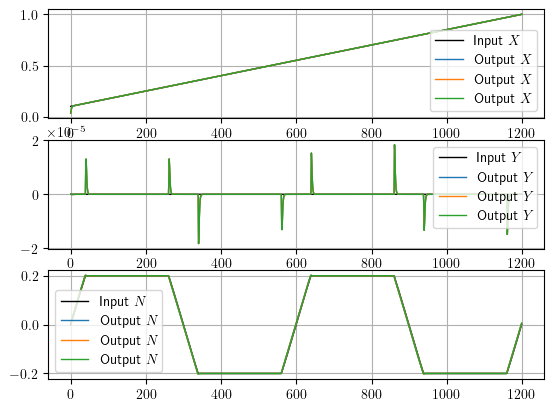

In [3]:
n = 1200
tau_cmd = np.zeros((n, 6))
tau_cmd[:,0] = np.linspace(0.1, 1.0, n)
tau_cmd[:,5] = gen_clipped_sin(n, 0.5, 2.0, 0.0, 0, -0.2, 0.2)

d_tau_cmd = np.gradient(tau_cmd, axis=0) / time_step

xi_hist, theta_hist, tau_hist = run_tests(tau_cmd=tau_cmd, d_tau_cmd=d_tau_cmd, allocators=initialize_allocators())
plot_histories(tau_cmd=tau_cmd, tau_alloc=tau_hist)


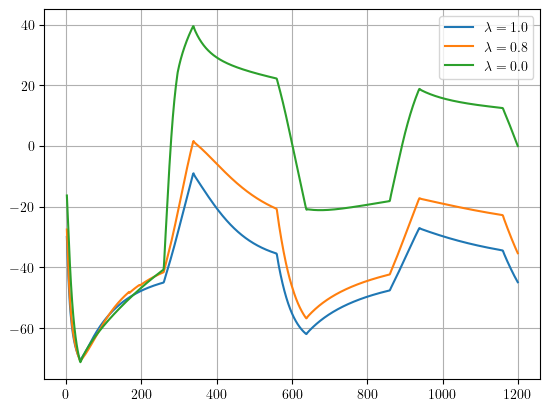

In [4]:
angles = []
for control_input in xi_hist:
    a = np.empty((len(control_input), 2))
    for i, u in enumerate(control_input):
        a2 = np.arctan2(u[2], u[1])
        a3 = np.arctan2(u[4], u[3])
        a[i] = np.array([a3])
    angles.append(a)

for _, angle in enumerate(angles):
    angle[0:3,0] = None

plt.clf()
for _, angle in enumerate(angles):
    plt.plot(np.degrees(angle[:,0]))
    # plt.plot(angle[:,1])
    # plt.plot(np.degrees(np.unwrap(angle[:,0])))

    # plt.plot(angle[:,0])
    pass

colors = ['b','g','r']
for i, control_input in enumerate(xi_hist):
    u = np.array(control_input)
    # plt.plot(u[:,4], color=colors[i])
    # plt.plot(u[:,3], color=colors[i])
    # plt.plot(u[:,2], color=colors[i])
    # plt.plot(u[:,1], color=colors[i])
    # plt.plot(u[:,0], color=colors[i])
    pass



l = []
for i in lambda_p:
    l.append(f"$\lambda = {i}$")

plt.legend(l)
# plt.plot(np.unwrap(angles[3][:,0]))
plt.grid(True)

In [5]:
# save_mat(
#     filename="data/16.mat",
#     inputs=tau,
#     xi=control_inputs,
#     thetas=thetas,
#     outputs=outputs,
#     rho=rho,
#     gamma=gamma,
#     mu=mu,
#     lambda_p=lambda_p,
#     thruster=voithschneider_port
# )